# Tensorflow Image Classification Example
[source](https://www.tensorflow.org/tutorials/keras/classification)

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [8]:
print(tf.__version__)

2.4.0-dev20200712


In [10]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [12]:
train_images.shape

(60000, 28, 28)

In [13]:
len(train_labels)

60000

In [14]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

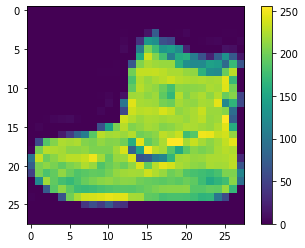

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
train_images = train_images / 255.0
test_images = test_images / 255.0

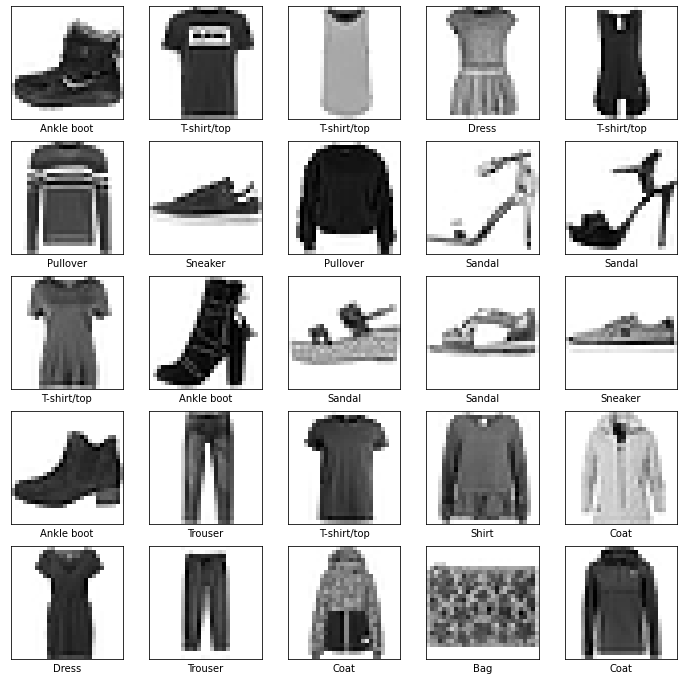

In [20]:
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10),
])

In [22]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [23]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5019 - accuracy: 0.8251
Epoch 2/10
1875/1875 [==============================] - 2s 951us/step - loss: 0.3780 - accuracy: 0.8633
Epoch 3/10
1875/1875 [==============================] - 2s 921us/step - loss: 0.3396 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 2s 971us/step - loss: 0.3136 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 2s 935us/step - loss: 0.2951 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2822 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 2s 993us/step - loss: 0.2671 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2570 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 2s 983us/step - loss: 0.2476 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step -

In [25]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy: {}'.format(test_acc))

313/313 - 0s - loss: 0.3336 - accuracy: 0.8821

Test accuracy: 0.882099986076355


In [30]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
np.argmax(predictions[0])
test_labels[0]


9

In [35]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

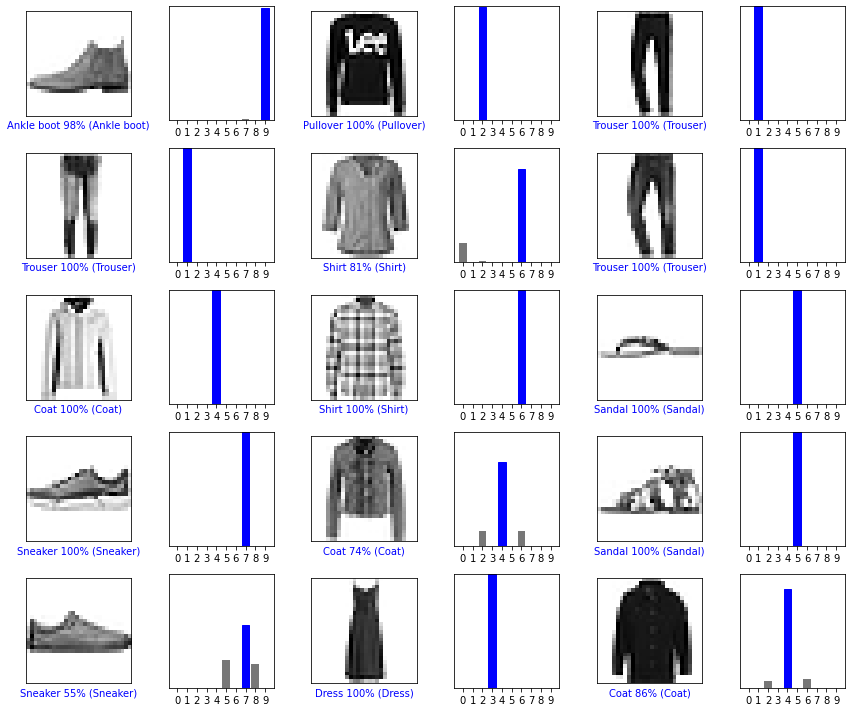

In [38]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

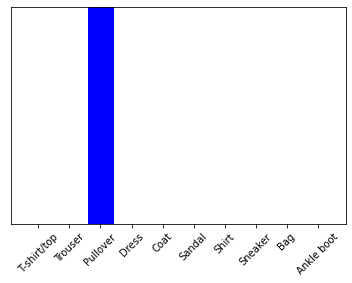

In [46]:
img = (np.expand_dims(test_images[1], 0))
predictions_single = probability_model.predict(img)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)